# ANOVA

In [1]:
import numpy as np
from scipy import stats

# Customer satisfaction scores (1-10) for each store layout
layout_A = np.array([7, 8, 6, 7, 8, 7, 6, 8])
layout_B = np.array([8, 9, 7, 8, 9, 8, 7, 8])
layout_C = np.array([6, 7, 5, 6, 7, 6, 5, 7])
layout_D = np.array([7, 8, 6, 7, 8, 7, 6, 7])

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(layout_A, layout_B, layout_C, layout_D)

In [2]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Combine all data for post-hoc analysis
all_data = np.concatenate([layout_A, layout_B, layout_C, layout_D])
labels = np.repeat(['A', 'B', 'C', 'D'], [len(layout_A), len(layout_B), 
                                         len(layout_C), len(layout_D)])

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(all_data, labels)
tukey_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,0.875,0.1485,-0.2119,1.9619,False
A,C,-1.0,0.0798,-2.0869,0.0869,False
A,D,-0.125,0.989,-1.2119,0.9619,False
B,C,-1.875,0.0003,-2.9619,-0.7881,True
B,D,-1.0,0.0798,-2.0869,0.0869,False
C,D,0.875,0.1485,-0.2119,1.9619,False


# EXAMPLE 2

fstat: 59.4042553191489, pvalue: 5.123203267758799e-14


group1,group2,meandiff,p-adj,lower,upper,reject
Gesture,Hamburger,3.0,0.0,1.4924,4.5076,True
Gesture,Tab Bar,-4.4,0.0,-5.9076,-2.8924,True
Gesture,Traditional,-1.0,0.2963,-2.5076,0.5076,False
Hamburger,Tab Bar,-7.4,0.0,-8.9076,-5.8924,True
Hamburger,Traditional,-4.0,0.0,-5.5076,-2.4924,True
Tab Bar,Traditional,3.4,0.0,1.8924,4.9076,True


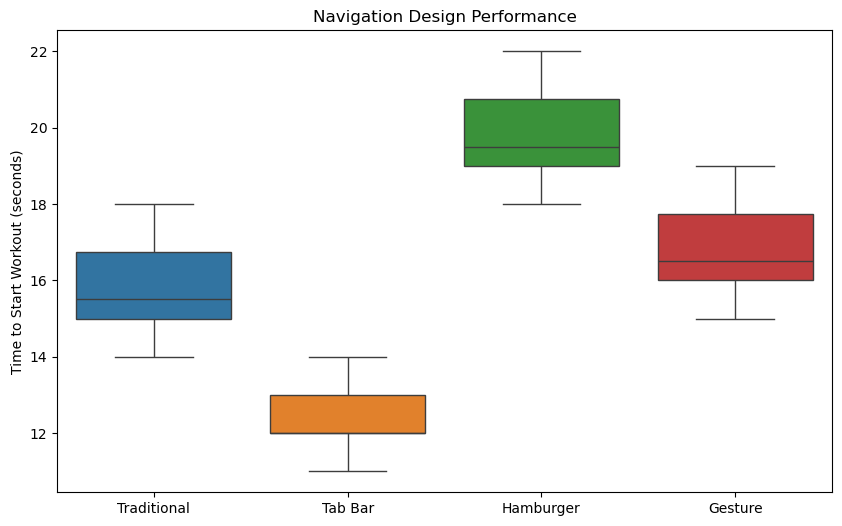

In [4]:
import numpy as np
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns

# Time (in seconds) for users to find and start a workout
design_A = np.array([15, 17, 14, 16, 15, 18, 16, 14, 17, 15])  # Traditional menu
design_B = np.array([12, 13, 11, 14, 12, 13, 12, 11, 13, 12])  # Tab bar
design_C = np.array([19, 21, 18, 20, 19, 22, 20, 18, 21, 19])  # Hamburger menu
design_D = np.array([16, 18, 15, 17, 16, 19, 17, 15, 18, 16])  # Gesture-based

# First, let's visualize our data
plt.figure(figsize=(10, 6))
sns.boxplot(data=[design_A, design_B, design_C, design_D])
plt.xticks([0, 1, 2, 3], ['Traditional', 'Tab Bar', 'Hamburger', 'Gesture'])
plt.ylabel('Time to Start Workout (seconds)')
plt.title('Navigation Design Performance')

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(design_A, design_B, design_C, design_D)
print(f"fstat: {f_statistic}, pvalue: {p_value}")

# If we find significant differences, perform post-hoc analysis
all_data = np.concatenate([design_A, design_B, design_C, design_D])
design_labels = np.repeat(['Traditional', 'Tab Bar', 'Hamburger', 'Gesture'], 10)

tukey = pairwise_tukeyhsd(all_data, design_labels)
tukey.summary()